# LAB 7 - Cross Validation

In this lab we will talk about the apllications of cross-validation on:

    1. Decision Tree Classifier
    2. Decision Tree Regressor
    3. Random Forest Regression

## 1. Decision Tree Classifier with CV

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()
parole = pd.read_csv(path+"/NYCparole.csv")
parole.info()
parole.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Violator    6102 non-null   int64  
 1   Male        6102 non-null   int64  
 2   Age         6102 non-null   float64
 3   TimeServed  6102 non-null   float64
 4   Class       6102 non-null   object 
 5   Multiple    6102 non-null   int64  
 6   InCity      6102 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 333.8+ KB


,Violator,Male,Age,TimeServed,Class,Multiple,InCity
0,0,1,49.4,3.15,D,0,1
1,1,1,26.0,5.95,D,1,0
2,0,1,24.9,2.25,D,1,0
3,0,1,52.1,29.22,A,0,0
4,0,1,35.9,12.78,A,1,1


In [3]:
parole_enc = pd.get_dummies(parole, columns = ['Class'])

In [4]:
parole_enc.head()

,Violator,Male,Age,TimeServed,Multiple,InCity,Class_A,Class_B,Class_C,Class_D,Class_E
0,0,1,49.4,3.15,0,1,0,0,0,1,0
1,1,1,26.0,5.95,1,0,0,0,0,1,0
2,0,1,24.9,2.25,1,0,0,0,0,1,0
3,0,1,52.1,29.22,0,0,1,0,0,0,0
4,0,1,35.9,12.78,1,1,1,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
y = parole_enc['Violator']
X = parole_enc.drop(['Violator'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,  
                                                    stratify=parole_enc['Violator'],
                                                    random_state=88,)

In [6]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.001,
                             criterion = 'gini',
                             random_state = 88)

dtc = dtc.fit(X_train, y_train)

In [7]:
from sklearn.model_selection import GridSearchCV

#Exhaustive search over specified parameter values for an estimator.

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 

# default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2010 out of 2010 | elapsed:   14.9s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'class_weight': [{0: 1, 1: 20}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='acc

In [8]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0,0.841021
1,0.0005,0.840787
2,0.001,0.833059
3,0.0015,0.822525
4,0.002,0.802624
5,0.0025,0.792092
6,0.003,0.781562
7,0.0035,0.769856
8,0.004,0.748779
9,0.0045,0.737069


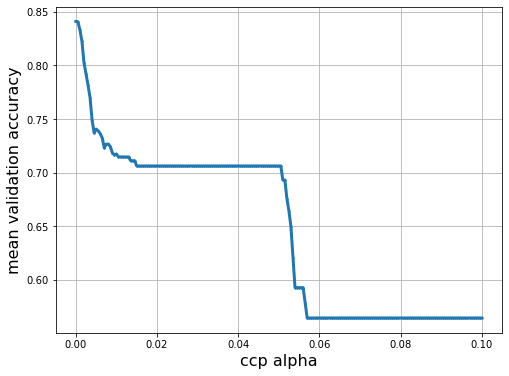

In [9]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [10]:
print('Grid best parameter (max. Accuracy): ', dtc_cv_acc.best_params_)
print('Grid best score (Accuracy): ', dtc_cv_acc.best_score_)

print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

Grid best parameter (max. Accuracy):  {'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 20}, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}
Grid best score (Accuracy):  0.8410213618157542
Node count = 241


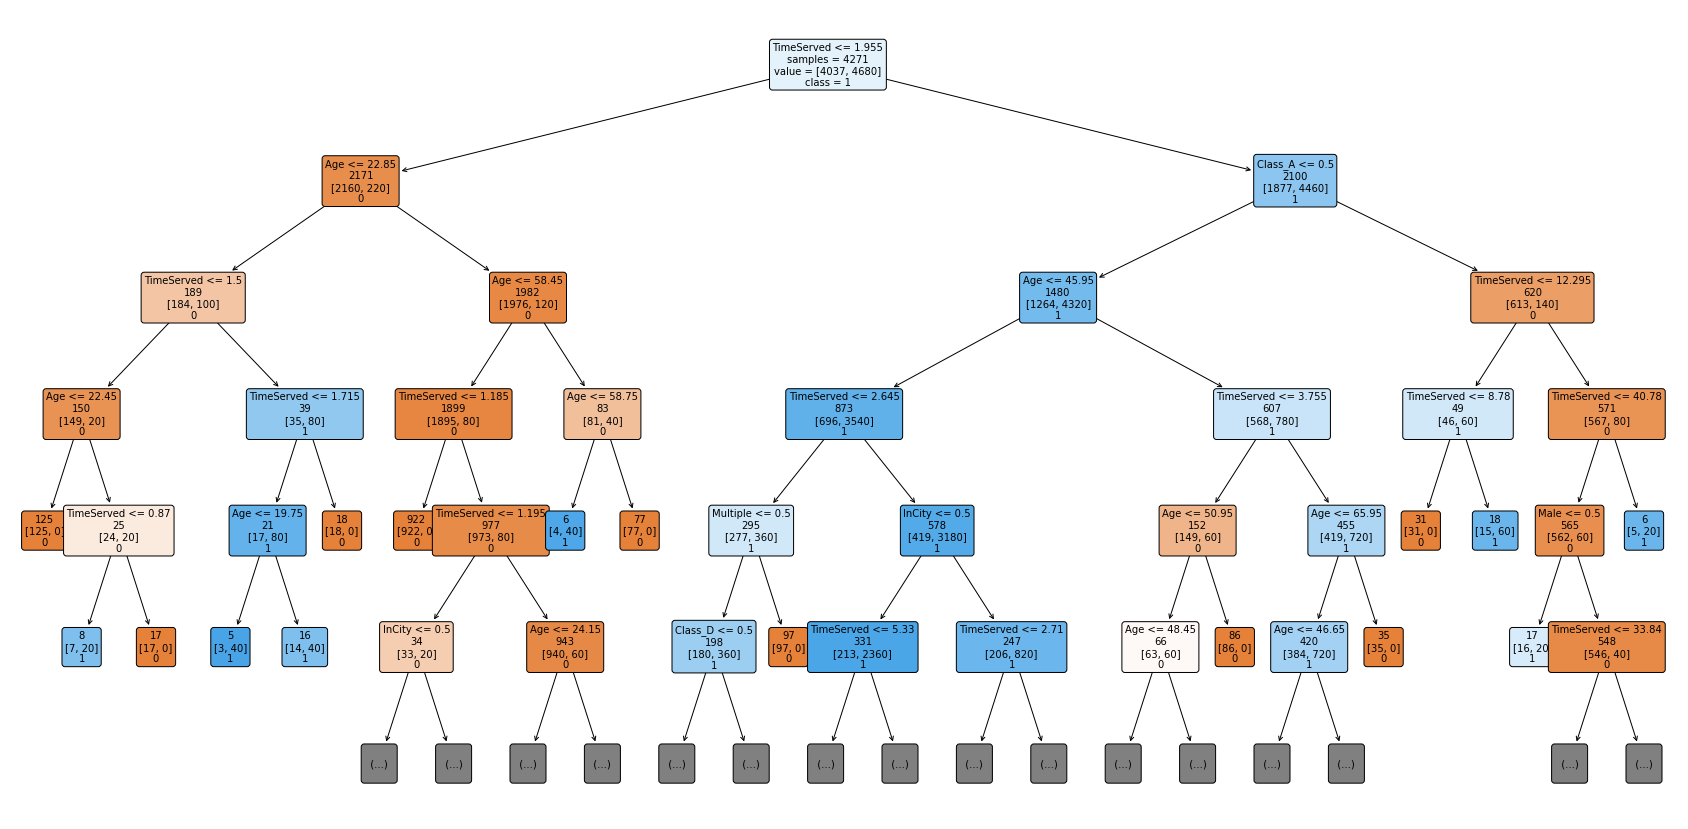

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=10,
          max_depth = 5,
          label='root')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = dtc_cv_acc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1468  262]
 [  30   71]]


### Cross-validation with Custom Loss Function

In [13]:
def average_loss_function(y_test, y_pred):
    
    weights = np.array([20 if i == 1 else 1 for i in y_test])
    
    return np.mean(weights*(y_test != y_pred))

In [14]:
from sklearn.metrics import make_scorer          

dtc = DecisionTreeClassifier()
dtc_cv_avgloss = GridSearchCV(dtc, param_grid = grid_values, cv=10, verbose=1,
                              scoring =  make_scorer(average_loss_function, greater_is_better=False))
dtc_cv_avgloss.fit(X_train, y_train)

ccp = dtc_cv_avgloss.cv_results_['param_ccp_alpha'].data
mean_avgloss = dtc_cv_avgloss.cv_results_['mean_test_score']*(-1) 
# sklearn uses the negative of the loss as an objective function to maximize, rather than implementation a minimization scheme

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2010 out of 2010 | elapsed:   14.2s finished


In [15]:
pd.DataFrame({'ccp alpha' : ccp, 'Mean Validation Average Loss': mean_avgloss}).head()

,ccp alpha,Mean Validation Average Loss
0,0,0.594951
1,0.0005,0.581836
2,0.001,0.553977
3,0.0015,0.528915
4,0.002,0.464293


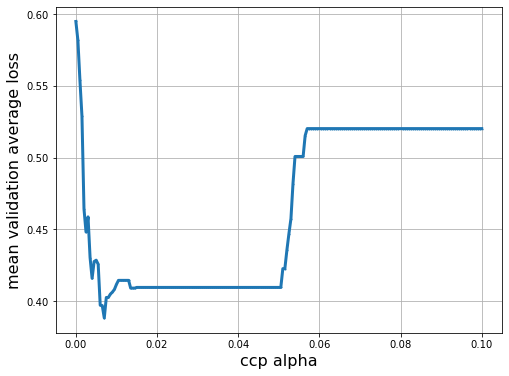

In [16]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation average loss', fontsize=16)
plt.scatter(ccp, mean_avgloss, s=1)
plt.plot(ccp, mean_avgloss, linewidth=3)
plt.grid(True, which='both')
plt.show()

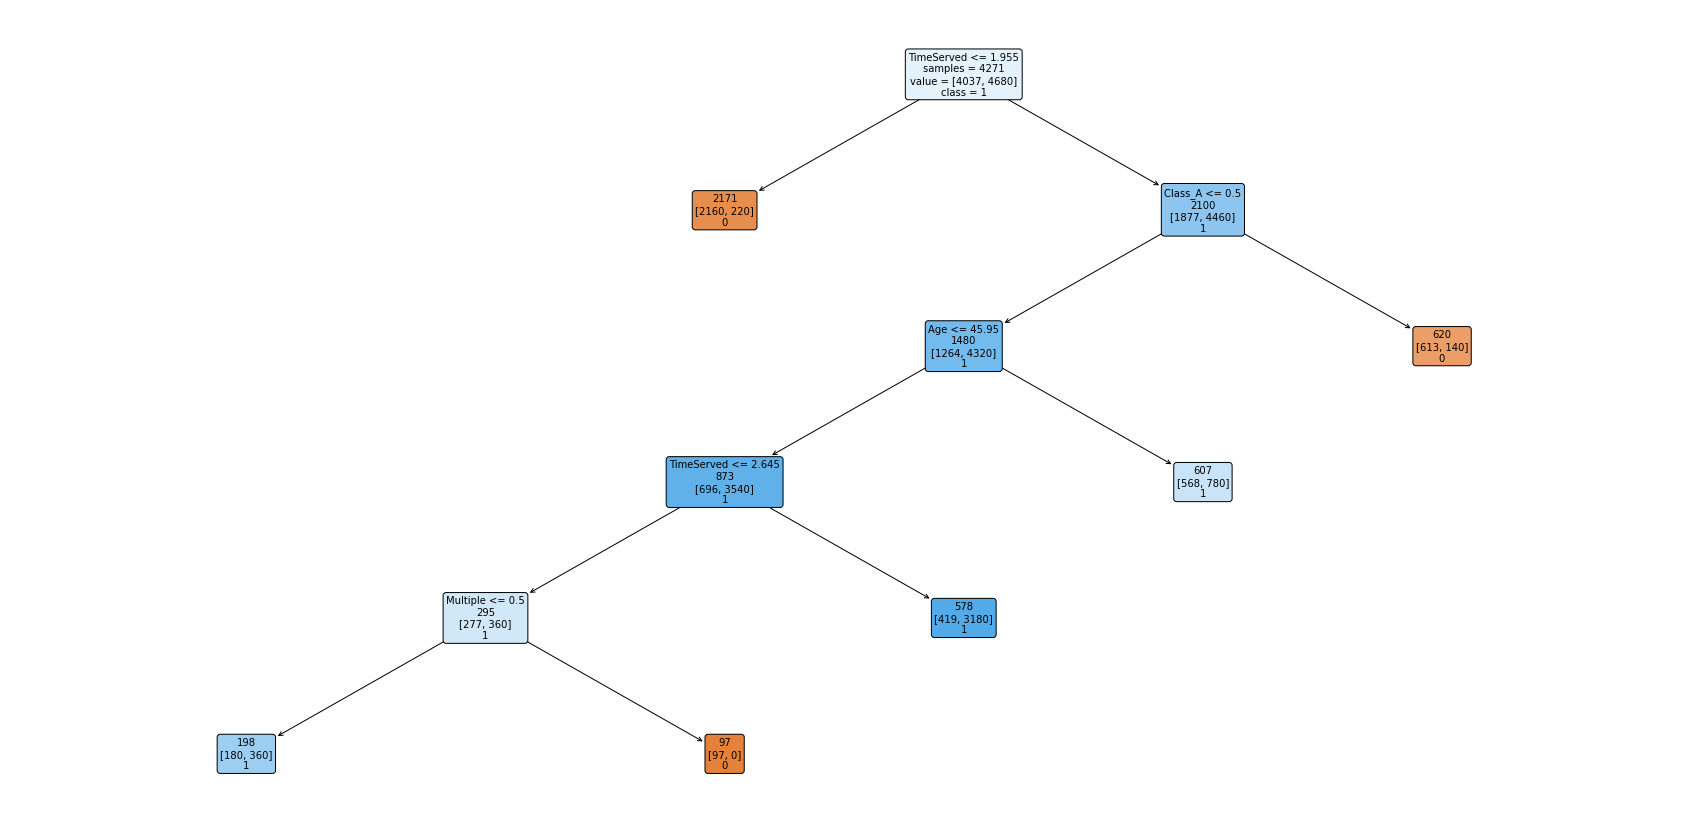

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(dtc_cv_avgloss.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=10,
          max_depth = 5,
          label='root')
plt.show()

## 2. Decision Tree Regressor with CV

In [18]:
path = os.getcwd() + "/CTR.csv"
ctr = pd.read_csv(path)
ctr.info()
ctr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CTR            6057 non-null   float64
 1   titleWords     6057 non-null   int64  
 2   adWords        6057 non-null   int64  
 3   depth          6057 non-null   int64  
 4   position       6057 non-null   int64  
 5   advCTR         6057 non-null   float64
 6   advCTRInPos    6057 non-null   float64
 7   queryCTR       6057 non-null   float64
 8   queryCTRInPos  6057 non-null   float64
 9   gender         6057 non-null   object 
 10  age            6057 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 520.6+ KB


,CTR,titleWords,adWords,depth,position,advCTR,advCTRInPos,queryCTR,queryCTRInPos,gender,age
0,0.0000,8,17,1,1,0.0136,0.0153,0.0000,0.0000,male,0-12
1,0.0000,9,19,3,3,0.0199,0.0088,0.0394,0.0125,male,25-30
2,0.0675,6,30,2,1,0.0825,0.1002,0.0200,0.0256,female,13-18
3,0.0000,5,19,3,2,0.0116,0.0090,0.0042,0.0017,female,25-30
4,0.0000,10,22,1,1,0.0186,0.0284,0.0294,0.0431,female,0-12


In [19]:
y_CTR = ctr['CTR']
X_CTR = pd.get_dummies(ctr.drop(['CTR'], axis=1))

X_CTR_train, X_CTR_test, y_CTR_train, y_CTR_test = train_test_split(X_CTR, y_CTR, test_size=0.3, random_state=88)
X_train.shape, X_test.shape

((4271, 10), (1831, 10))

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5, verbose=0)
dtr_cv.fit(X_CTR_train, y_CTR_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

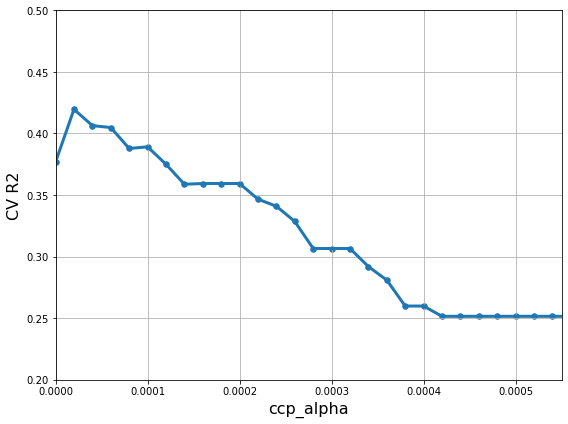

In [21]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [22]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 2e-05}


### Evaluation

In [23]:
from sklearn.metrics import r2_score

print('CV R2:', round(dtr_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_CTR_test, dtr_cv.predict(X_CTR_test)), 5))

CV R2: 0.4196
OSR2: 0.43546


## 3. Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84

building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [25]:
rf.verbose = False
print('OSR2:', round(r2_score(y_test, rf.predict(X_test)), 5))

OSR2: 0.27392


## Random Forest Regressor with CV

In [26]:
import time

grid_values = {'max_features': np.linspace(1,18,9, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

tic = time.time()

rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(X_CTR_train, y_CTR_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 118.66 s


(0.3, 0.6)

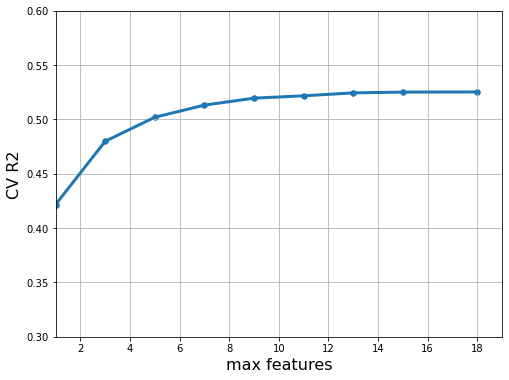

In [27]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.3, 0.6])

In [28]:
print(rf_cv.best_params_)

{'max_features': 18, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [29]:
print('CV R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_CTR_test, rf_cv.predict(X_CTR_test)), 5))

CV R2: 0.5252
OSR2: 0.55205


### Feature Importance

In [30]:
pd.DataFrame({'Feature' : X_CTR_train.columns, 
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,titleWords,3.7
1,adWords,3.1
2,depth,1.6
3,position,0.2
4,advCTR,11.8
5,advCTRInPos,48.1
6,queryCTR,6.9
7,queryCTRInPos,21.9
8,gender_female,0.6
9,gender_male,0.4


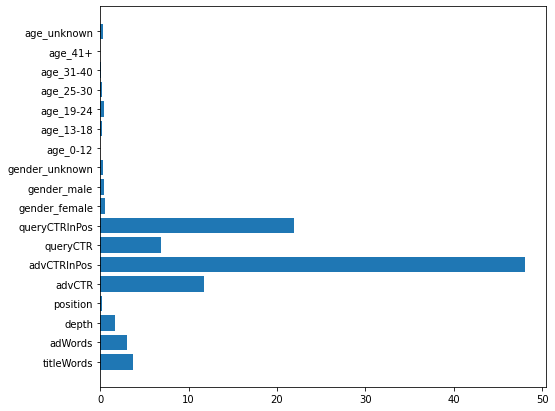

In [31]:
plt.figure(figsize=(8,7))
plt.barh(X_CTR_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()